### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции:
strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

#### Допзадание

Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
from scipy.optimize import differential_evolution

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy, maxiter, popsize, tol, mutation, recombination и updating.

In [43]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [113]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, 
                                strategy='rand2bin', maxiter=150, popsize=20, 
                                tol=0.1, mutation=0.4, recombination=0.4,
                                updating='immediate')
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5863
     nit: 144
 success: True
       x: array([0., 0.])

# Постройте графики количества итераций оптимизации функции ackley от значения параметра.

In [105]:
def diff_evol(input_function, x):
    bounds = [(-x, x), (-x, x)]
    result = differential_evolution(input_function, bounds, seed=42)
    return result

In [106]:
diff_evol(ackley,42)

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2973
     nit: 96
 success: True
       x: array([0., 0.])

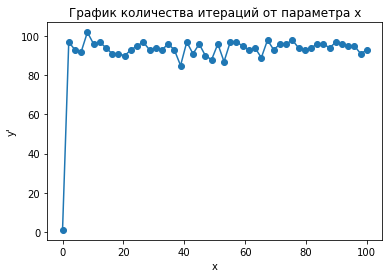

In [107]:
x1 = np.linspace(0, 100, 50)
y1 = [diff_evol(ackley,i).nit for i in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График количества итераций от параметра x')
plt.ylabel("y'")
plt.xlabel('x')

plt.show()

In [116]:
def diff_evol_2(input_function, input_seed=42):
    bounds = [(-10, 10), (-10, 10)]
    result = differential_evolution(input_function, bounds, seed=input_seed)
    return result

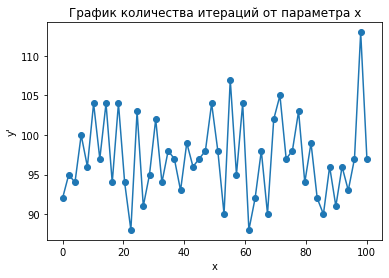

In [117]:
x1 = np.linspace(0, 100, 50)
y1 = [diff_evol_2(ackley,i).nit for i in range(len(x1))]
plt.plot(x1, y1, '-o')
plt.title('График количества итераций от параметра x')
plt.ylabel("y'")
plt.xlabel('x')

plt.show()

# Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [104]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42, 
                                strategy='best1bin', maxiter=150, popsize=20, 
                                tol=0.01, mutation=0.01, recombination=1,
                                updating='immediate')
result

     fun: 1.5479916459781862e-08
     jac: array([0.10836523, 0.92990469])
 message: 'Optimization terminated successfully.'
    nfev: 280
     nit: 3
 success: True
       x: array([-4.78297526e-09, -2.66019308e-09])

Чисто комбинаторно с параметрами поиграл и получил практически нулевое значение функции и параметра за 3 итерации. Вот только эффективность такого метода под очень большим вопросом...

Даниил, перефразируйте значение параметра tol и seed, пожалуйста. 